Universidad Galileo

Statistical Learning II

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Práctica No. 1
### K-Means

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import mixture

Se extrae el conjunto de datos desde el archivo *.csv

In [2]:
dataframe = pd.read_csv('estaturas.csv')
dataframe = dataframe[["Edad","Estatura"]]

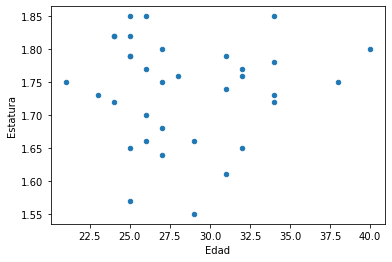

In [3]:
dataframe.plot.scatter(x ="Edad",y="Estatura")

In [4]:
datos=dataframe.to_numpy()

### Hard-clustering K-Means

A continuación se presenta una implementaciónn de Hard-clustering utilizando el algoritmo de K-Means únicamente con Numpy y Pandas. Para ello se define inicialmente una función que calcula la distancia euclidiana entre dos puntos (observaciones del tipo **(x1,x2)**).

In [5]:
def distancia_euclidiana(x1,x2): 
    distancia_x = x1[0] - x2[0]
    distancia_y = x1[1] - x2[1]

    distancia_total = np.sqrt((distancia_x)**2 + (distancia_y)**2)
    
    return distancia_total

Función de K-Means, que recibe como parámetros el dataset de entrenamiento. Se debe especificar:
- Set de Datos
- Número de Clusters
- Número de Iteraciones

Esta función inicializa aleatoriamente la posición inicial de los centroides, tomando una muestra aleatoria del dataset. Es decir, los centroides son cada uno una observación existente en el dataset de entrenamiento (según la recomendación vista en clase). La función retorna:
- Desplazamiento de Centroides con cada iteración.
- DataFrame de Entrenamiento con una columna adicional indicando el cluster al que se estima que cada observación pertenece.
- Gráfico de Dispersión, identificando por color los clusters y la posición final de los centroides con una "X"

In [6]:
def hard_k_means(df,k,iteraciones):
    
    # Número de elementos en el dataset
    elementos = np.shape(df)[0] 
    
    # Memoria para el Vector de Centroides
    centroides = np.zeros((k,2)) 
    
    # k posiciones aleatorias para los centroides, tomadas del dataset original
    indices_aleatorios = random.sample(range(elementos), k) 
    
    # Inicialización del Vector de Centroides:
    # Se toman "k" puntos aleatorios del dataset original
    for j in np.arange(k):
        centroides[j][0] = df[indices_aleatorios[j]][0]
        centroides[j][1] = df[indices_aleatorios[j]][1]
    
    print ("Posición Inicial de Centroides:")
    print (centroides)

    for n in np.arange(iteraciones):
        
        # Inicialización del Vector de Distancias
        distancias= np.full((elementos,k+1), np.inf) 
            
        for i in np.arange(elementos): # Para cada observación en el dataframe
        
            for j in np.arange(k): # Para cada centroide especificado
                                 
                # Calculamos la distancia de cada observación (x1,x2) a cada Centroide
                distancias[i][j]=distancia_euclidiana(df[i],centroides[j])
        
            # Al terminar de calcular las distancias, la última columna contendrá el número de
            # cluster al que pertenece la observación (la distancia más pequeña a un centroide)
            distancias[i][k] = np.argmin(distancias[i])
    
        for j in np.arange(k): # Para cada centroide especificado
            filtro_centroide = distancias[:,-1]==j
            coor_x_centroide = np.average(df[filtro_centroide][:,0])
            coor_y_centroide = np.average(df[filtro_centroide][:,1])
        
            centroides[j][0] = coor_x_centroide
            centroides[j][1] = coor_y_centroide
        
        print("Posición de Centroides en Iteración ",n+1)
        print(centroides)
        
    # DataFrame de Salida: Observaciones con Cluster Asignado    
    dataframe = pd.DataFrame(df,columns=['Edad','Estatura'])   
    cluster = distancias[:,k] + 1
    dataframe['Cluster']=cluster
    
    # DataFrame de Centroides Encontrados
    df_centroides = pd.DataFrame(centroides,columns=['Edad','Estatura'])
    
    # Gráfica de Observaciones Agrupadas por Cluster y Gráfica de Centroides
    fig,ax1=plt.subplots()
    ax2 = dataframe.plot.scatter(x ="Edad",y="Estatura",c='Cluster',colormap='viridis',ax=ax1)
    ax3 = df_centroides.plot(kind='scatter',x="Edad", y="Estatura", s=100, marker ='x', color='r', ax=ax1)
    print(ax2,ax3)
    
    return dataframe

Posición Inicial de Centroides:
[[32.    1.76]
 [25.    1.82]]
Posición de Centroides en Iteración  1
[[32.92857143  1.72571429]
 [25.3         1.746     ]]
Posición de Centroides en Iteración  2
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  3
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  4
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  5
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  6
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  7
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  8
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  9
[[33.58333333  1.74583333]
 [25.63636364  1.73318182]]
Posición de Centroides en Iteración  10
[[33.58333333  1.74583333]
 [25.63636364  1.7331818

,Edad,Estatura,Cluster
0,26.0,1.77,2.0
1,31.0,1.74,1.0
2,24.0,1.72,2.0
3,34.0,1.78,1.0
4,32.0,1.65,1.0
5,29.0,1.66,2.0
6,27.0,1.64,2.0
7,34.0,1.85,1.0
8,26.0,1.85,2.0
9,21.0,1.75,2.0


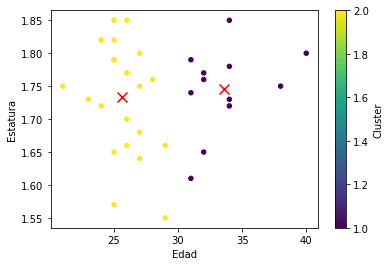

In [7]:
hard_k_means(datos,2,10)

In [8]:
def soft_k_means(df,k):
    gmm = mixture.GaussianMixture(n_components=k).fit(datos)
    
    # DataFrame de Salida: Observaciones con Cluster Asignado    
    dataframe = pd.DataFrame(df,columns=['Edad','Estatura'])   
    cluster = gmm.predict(datos) + 1
    cluster_proba = gmm.predict_proba(datos)*100
    dataframe['Cluster']=cluster
    dataframe['Probabilidad Cluster 1 (%)']=cluster_proba[:,0].round(3)
    dataframe['Probabilidad Cluster 2 (%)']=cluster_proba[:,1].round(3)
    
    # Gráfica de Observaciones Agrupadas por Cluster y Gráfica de Centroides
    fig,ax1=plt.subplots()
    ax2 = dataframe.plot.scatter(x ="Edad",y="Estatura",c='Cluster',colormap='viridis',ax=ax1)
    print(ax2)
    
    
    return dataframe

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%)
0,26.0,1.77,2,1.101,98.899
1,31.0,1.74,1,97.571,2.429
2,24.0,1.72,2,0.551,99.449
3,34.0,1.78,1,99.999,0.001
4,32.0,1.65,1,97.691,2.309
5,29.0,1.66,2,40.327,59.673
6,27.0,1.64,2,7.875,92.125
7,34.0,1.85,1,100.000,0.000
8,26.0,1.85,2,0.134,99.866
9,21.0,1.75,2,0.063,99.937


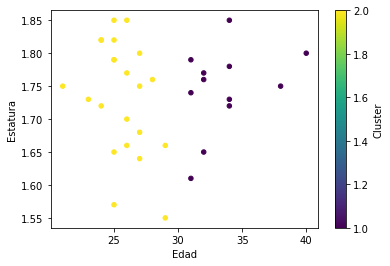

In [9]:
soft_k_means(datos,2)

### Experimentos para encontrar el número de Clusters K

Se utilizará el algoritmo de hard-clustering para los siguientes experimentos.

#### Experimento No. 1 (K=2)

**Hard-Clustering**

Posición Inicial de Centroides:
[[25.    1.65]
 [31.    1.79]]
Posición de Centroides en Iteración  1
[[25.15789474  1.74526316]
 [32.6         1.728     ]]
Posición de Centroides en Iteración  2
[[25.3         1.746     ]
 [32.92857143  1.72571429]]
Posición de Centroides en Iteración  3
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  4
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  5
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  6
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  7
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  8
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  9
[[25.63636364  1.73318182]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  10
[[25.63636364  1.73318182]
 [33.58333333  1.7458333

,Edad,Estatura,Cluster
0,26.0,1.77,1.0
1,31.0,1.74,2.0
2,24.0,1.72,1.0
3,34.0,1.78,2.0
4,32.0,1.65,2.0
5,29.0,1.66,1.0
6,27.0,1.64,1.0
7,34.0,1.85,2.0
8,26.0,1.85,1.0
9,21.0,1.75,1.0


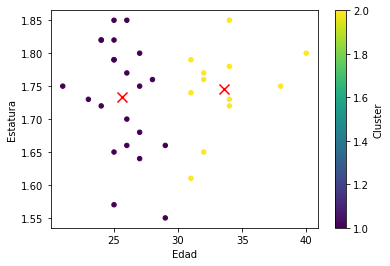

In [10]:
hard_k_means(datos,2,10)

Se logró identificar dos clusters, aunque al parecer uno de los clusters tiene pocas observaciones, correspondientes a las personas que tienen más edad (una división identificable a partir de los 30 años).

**Soft-Clustering**

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%)
0,26.0,1.77,1,98.899,1.101
1,31.0,1.74,2,2.429,97.571
2,24.0,1.72,1,99.449,0.551
3,34.0,1.78,2,0.001,99.999
4,32.0,1.65,2,2.309,97.691
5,29.0,1.66,1,59.673,40.327
6,27.0,1.64,1,92.125,7.875
7,34.0,1.85,2,0.000,100.000
8,26.0,1.85,1,99.866,0.134
9,21.0,1.75,1,99.937,0.063


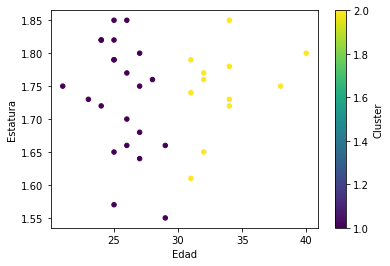

In [11]:
soft_k_means(datos,2)

Ambos métodos identifican los mismos clusters, con división a partir de los 30 años prácticamente.

#### Experimento No. 2 (K = 3)

**Hard-Clustering**

Posición Inicial de Centroides:
[[34.    1.85]
 [27.    1.68]
 [23.    1.73]]
Posición de Centroides en Iteración  1
[[33.58333333  1.74583333]
 [26.76923077  1.69538462]
 [24.          1.78777778]]
Posición de Centroides en Iteración  2
[[33.58333333  1.74583333]
 [27.09090909  1.71090909]
 [24.18181818  1.75545455]]
Posición de Centroides en Iteración  3
[[33.58333333  1.74583333]
 [27.09090909  1.71090909]
 [24.18181818  1.75545455]]
Posición de Centroides en Iteración  4
[[33.58333333  1.74583333]
 [27.09090909  1.71090909]
 [24.18181818  1.75545455]]
Posición de Centroides en Iteración  5
[[33.58333333  1.74583333]
 [27.09090909  1.71090909]
 [24.18181818  1.75545455]]
Posición de Centroides en Iteración  6
[[33.58333333  1.74583333]
 [27.09090909  1.71090909]
 [24.18181818  1.75545455]]
Posición de Centroides en Iteración  7
[[33.58333333  1.74583333]
 [27.09090909  1.71090909]
 [24.18181818  1.75545455]]
Posición de Centroides en Iteración  8
[[33.58333333  1.74583333]
 [27.0909

,Edad,Estatura,Cluster
0,26.0,1.77,2.0
1,31.0,1.74,1.0
2,24.0,1.72,3.0
3,34.0,1.78,1.0
4,32.0,1.65,1.0
5,29.0,1.66,2.0
6,27.0,1.64,2.0
7,34.0,1.85,1.0
8,26.0,1.85,2.0
9,21.0,1.75,3.0


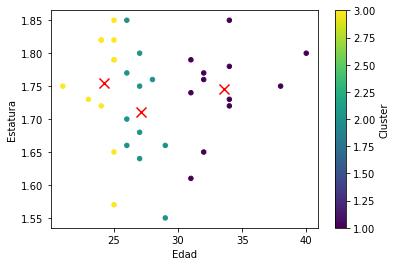

In [12]:
hard_k_means(datos,3,10)

En este experimento, se encontró una división intermedia, aproximadamente entre el rango de 27 a 32 años. El primer cluster agrupa edades más grandes con estaturas más grandes, a diferencia del primero.

**Soft-Clustering**

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%)
0,26.0,1.77,2,0.000,98.628
1,31.0,1.74,1,50.398,0.643
2,24.0,1.72,2,0.000,99.369
3,34.0,1.78,3,35.809,0.000
4,32.0,1.65,1,99.820,0.156
5,29.0,1.66,2,48.963,50.849
6,27.0,1.64,2,0.523,99.474
7,34.0,1.85,1,99.384,0.000
8,26.0,1.85,2,0.000,99.999
9,21.0,1.75,2,0.000,99.364


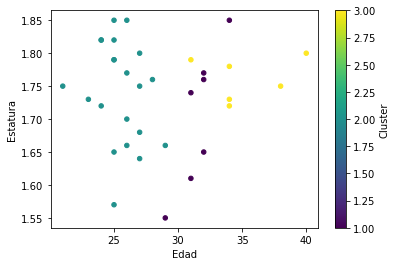

In [13]:
soft_k_means(datos,3)

Aquí puede verse una diferencia con el Hard-Clustering, y es que con soft-clustering hay un cluster con edades altas que solamente tiene dos observaciones. El algoritmo de hard-clustering parece encontrar clusters más balanceados en cuanto a cantidad de observaciones por cluster.


#### Experimento No. 3 (K = 4)

**Hard-Clustering**

Posición Inicial de Centroides:
[[25.    1.57]
 [40.    1.8 ]
 [31.    1.79]
 [25.    1.65]]
Posición de Centroides en Iteración  1
[[25.          1.57      ]
 [39.          1.775     ]
 [31.61538462  1.72076923]
 [25.16666667  1.755     ]]
Posición de Centroides en Iteración  2
[[23.71428571  1.72285714]
 [39.          1.775     ]
 [31.91666667  1.7175    ]
 [26.15384615  1.75846154]]
Posición de Centroides en Iteración  3
[[23.2         1.768     ]
 [39.          1.775     ]
 [32.5         1.74      ]
 [26.35294118  1.72294118]]
Posición de Centroides en Iteración  4
[[23.2         1.768     ]
 [39.          1.775     ]
 [32.5         1.74      ]
 [26.35294118  1.72294118]]
Posición de Centroides en Iteración  5
[[23.2         1.768     ]
 [39.          1.775     ]
 [32.5         1.74      ]
 [26.35294118  1.72294118]]
Posición de Centroides en Iteración  6
[[23.2         1.768     ]
 [39.          1.775     ]
 [32.5         1.74      ]
 [26.35294118  1.72294118]]
Posición de Centroi

,Edad,Estatura,Cluster
0,26.0,1.77,4.0
1,31.0,1.74,3.0
2,24.0,1.72,1.0
3,34.0,1.78,3.0
4,32.0,1.65,3.0
5,29.0,1.66,4.0
6,27.0,1.64,4.0
7,34.0,1.85,3.0
8,26.0,1.85,4.0
9,21.0,1.75,1.0


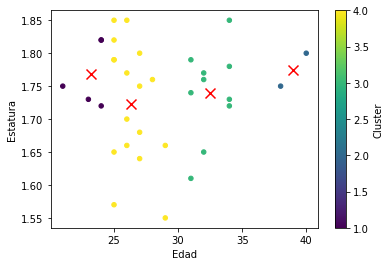

In [14]:
hard_k_means(datos,4,10)

En este caso, se segmentó aún más uno de los clusters. Por los colores básicamente se ve que se segmenta por edades, ya que la variación por edad en cada segmento es amplia. 

**Soft-clustering**

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%)
0,26.0,1.77,1,73.737,0.000
1,31.0,1.74,2,0.152,99.842
2,24.0,1.72,1,99.885,0.000
3,34.0,1.78,2,0.000,100.000
4,32.0,1.65,2,0.013,99.982
5,29.0,1.66,4,12.167,13.621
6,27.0,1.64,1,53.136,0.064
7,34.0,1.85,2,0.000,100.000
8,26.0,1.85,1,68.469,0.000
9,21.0,1.75,1,100.000,0.000


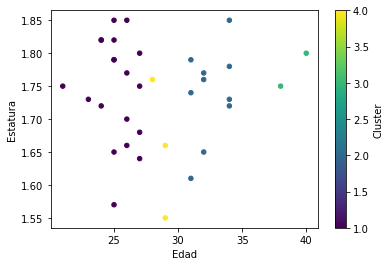

In [15]:
soft_k_means(datos,4)

Se observa el mismo patrón, segmentando las observaciones por rango de edades prácticamente.

#### Experimento No. 4 (K = 5)

**Hard-Clustering**

Posición Inicial de Centroides:
[[31.    1.79]
 [27.    1.64]
 [27.    1.68]
 [26.    1.85]
 [24.    1.82]]
Posición de Centroides en Iteración  1
[[33.58333333  1.74583333]
 [28.33333333  1.61666667]
 [27.25        1.7475    ]
 [25.8         1.766     ]
 [24.1         1.746     ]]
Posición de Centroides en Iteración  2
[[33.58333333  1.74583333]
 [28.66666667  1.65666667]
 [27.          1.7175    ]
 [25.4         1.745     ]
 [23.2         1.768     ]]
Posición de Centroides en Iteración  3
[[34.44444444  1.75666667]
 [29.83333333  1.685     ]
 [27.          1.7175    ]
 [25.4         1.745     ]
 [23.2         1.768     ]]
Posición de Centroides en Iteración  4
[[35.66666667  1.77166667]
 [30.875       1.69125   ]
 [27.2         1.726     ]
 [25.4         1.745     ]
 [23.2         1.768     ]]
Posición de Centroides en Iteración  5
[[35.66666667  1.77166667]
 [31.5         1.72      ]
 [27.71428571  1.69142857]
 [25.4         1.745     ]
 [23.2         1.768     ]]
Posición de Centr

,Edad,Estatura,Cluster
0,26.0,1.77,4.0
1,31.0,1.74,2.0
2,24.0,1.72,5.0
3,34.0,1.78,1.0
4,32.0,1.65,2.0
5,29.0,1.66,3.0
6,27.0,1.64,3.0
7,34.0,1.85,1.0
8,26.0,1.85,4.0
9,21.0,1.75,5.0


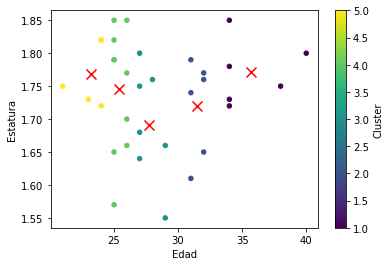

In [16]:
hard_k_means(datos,5,10)

Se comprueba aún más que la agrupación es siempre segmentando las edades.

**Soft-clustering**

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%)
0,26.0,1.77,2,0.0,74.203
1,31.0,1.74,3,0.0,0.088
2,24.0,1.72,2,0.0,99.913
3,34.0,1.78,1,100.0,0.000
4,32.0,1.65,3,0.0,0.011
5,29.0,1.66,5,0.0,12.964
6,27.0,1.64,2,0.0,53.385
7,34.0,1.85,1,100.0,0.000
8,26.0,1.85,2,0.0,68.502
9,21.0,1.75,2,0.0,100.000


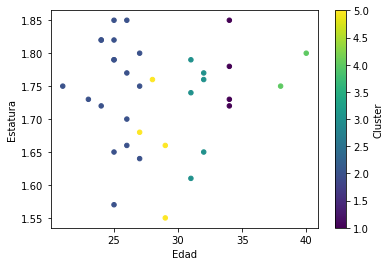

In [17]:
soft_k_means(datos,5)

Se obtienen prácticamente los mismos resultados que con hard-clustering.

Finalmente el último experimento.

#### Experimento No. 5 (K = 6)

**Hard-clustering**

Posición Inicial de Centroides:
[[27.    1.64]
 [31.    1.74]
 [24.    1.82]
 [32.    1.76]
 [27.    1.68]
 [26.    1.77]]
Posición de Centroides en Iteración  1
[[28.33333333  1.61666667]
 [31.          1.71333333]
 [23.71428571  1.78714286]
 [34.44444444  1.75666667]
 [27.25        1.7475    ]
 [25.5         1.7225    ]]
Posición de Centroides en Iteración  2
[[28.66666667  1.65666667]
 [31.5         1.72      ]
 [23.2         1.768     ]
 [35.66666667  1.77166667]
 [27.          1.7175    ]
 [25.4         1.745     ]]
Posición de Centroides en Iteración  3
[[28.66666667  1.65666667]
 [31.5         1.72      ]
 [23.2         1.768     ]
 [35.66666667  1.77166667]
 [27.          1.7175    ]
 [25.4         1.745     ]]
Posición de Centroides en Iteración  4
[[28.66666667  1.65666667]
 [31.5         1.72      ]
 [23.2         1.768     ]
 [35.66666667  1.77166667]
 [27.          1.7175    ]
 [25.4         1.745     ]]
Posición de Centroides en Iteración  5
[[28.66666667  1.65666667]
 [3

,Edad,Estatura,Cluster
0,26.0,1.77,6.0
1,31.0,1.74,2.0
2,24.0,1.72,3.0
3,34.0,1.78,4.0
4,32.0,1.65,2.0
5,29.0,1.66,1.0
6,27.0,1.64,5.0
7,34.0,1.85,4.0
8,26.0,1.85,6.0
9,21.0,1.75,3.0


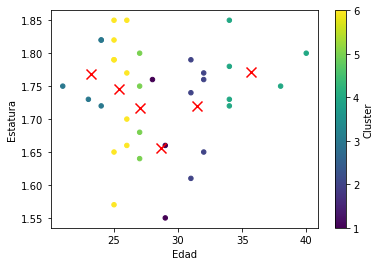

In [18]:
hard_k_means(datos,6,10)

Este resultado final confirma que los clusters se están formando por edades prácticamente, y no por estaturas.

**Soft-clustering**

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%)
0,26.0,1.77,1,49.999,0.0
1,31.0,1.74,4,0.007,0.0
2,24.0,1.72,3,0.606,0.0
3,34.0,1.78,2,0.000,100.0
4,32.0,1.65,4,0.004,0.0
5,29.0,1.66,1,99.997,0.0
6,27.0,1.64,1,89.070,0.0
7,34.0,1.85,2,0.000,100.0
8,26.0,1.85,6,25.247,0.0
9,21.0,1.75,6,0.000,0.0


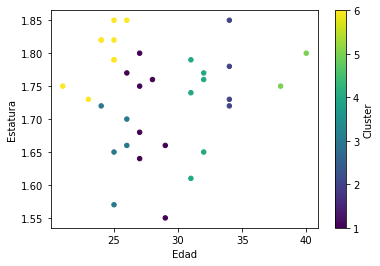

In [19]:
soft_k_means(datos,6)

### Conclusiones

Sobre el número adecuado de clusters para este ejemplo, según lo observado, al aumentar el número de clusters lo que el algoritmo encuentra es una segmentación por edades. Mientras más incrementa K, mas segmentos por edades se realizan. La estatura realmente no se agrupa, ya que en los clusters hay mucha más variabilidad.
Basado en esto, y en el conocimiento que se tiene de los datos, podríamos proponer un **K = 3**, donde uno de los clusters posee observaciones de estudiantes jóvenes, otro con edades intermedias y el otro estudiantes de mayor edad.

### Factibilidad del Método del Codo (Elbow Method):

Según lo investigado, el método del codo en este caso considero que pudiera no ser aplicable. El método del codo está basado en la métrica de **distorsión** que mide el promedio de las distancias al cuadrado entre las observaciones y su respectivo centroide, puede funcionar en datos que no tienen una dispersión muy alta. En el caso de esta práctica hay una dispersión aún alta (observable en las estaturas) aún teniendo varios clusters o segmentos de edad.

El método del codo propone que debe elegirse el número de clusters K en donde la distorsión deje de decrecer bruscamente, es decir, que su tasa de cambio sufra un cambio que pueda observarse (de allí su nombre de codo). Esto no siempre va a ser posible con cualquier conjunto de datos, pues dependiendo de su dispersión, este "codo" pudiera no ser fácilmente identificable. En el caso de esta práctica, vemos que aún incrementando K, la dispersión de los datos en cada cluster es amplia y pudiera ser difícil observar una disminución "brusca" de la distorsión. Aunque esto es concluido de forma visual, lo más adecuado es verificar la curva de "distrosión vrs. K" para ver si es identificable un "codo" en ella.

## Predicciones sobre Nuevas Observaciones
Se utilizarán los datos proporcionados en la segunda pestaña del set de datos.

In [20]:
nuevas_observaciones = pd.read_csv('anomalias.csv')
nuevas_observaciones = nuevas_observaciones[["Edad","Estatura"]]
nuevas_observaciones

,Edad,Estatura
0,2.4,0.25
1,2.5,175.10
2,250.0,0.15
3,14.0,150.00


De acuerdo a lo discutido en la sección anterior, se tomará K=3 para realizar las predicciones.

Posición Inicial de Centroides:
[[26.    1.66]
 [25.    1.57]
 [34.    1.85]]
Posición de Centroides en Iteración  1
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  2
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  3
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  4
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  5
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  6
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  7
[[27.09090909  1.71090909]
 [24.18181818  1.75545455]
 [33.58333333  1.74583333]]
Posición de Centroides en Iteración  8
[[27.09090909  1.71090909]
 [24.1818

,Edad,Estatura,Cluster
0,26.0,1.77,1.0
1,31.0,1.74,3.0
2,24.0,1.72,2.0
3,34.0,1.78,3.0
4,32.0,1.65,3.0
5,29.0,1.66,1.0
6,27.0,1.64,1.0
7,34.0,1.85,3.0
8,26.0,1.85,1.0
9,21.0,1.75,2.0


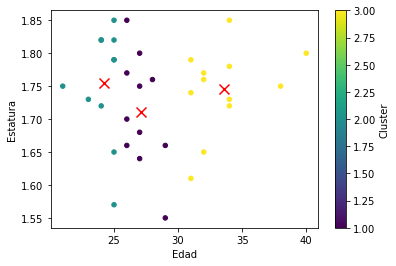

In [21]:
hard_k_means(datos,3,10)

In [27]:
modelo_hard_clustering = [[27.09090909,  1.71090909], [24.18181818,  1.75545455], [33.58333333,  1.74583333]]
modelo_hard_clustering = pd.DataFrame(modelo_hard_clustering,columns=["Edad","Estatura"])
modelo_hard_clustering

,Edad,Estatura
0,27.090909,1.710909
1,24.181818,1.755455
2,33.583333,1.745833


### Función de Predicción Hard-Clustering

In [28]:
def hard_clustering_predict(x_entrada,modelo_clustering):
    
    x_nueva = x_entrada.to_numpy()
    modelo = modelo_clustering.to_numpy()
    distancias = np.full([np.shape(x_nueva)[0],np.shape(modelo)[0]],np.inf)
    cluster = np.zeros(np.shape(x_nueva)[0])
    
    for i in np.arange(np.shape(x_nueva)[0]):
        
        for j in np.arange(np.shape(modelo)[0]):
            
            distancias[i][j]= distancia_euclidiana(x_nueva[i],modelo[j])
        
        cluster[i] = np.argmin(distancias[i]) + 1
        
    
     # DataFrame de Salida: Observaciones con Cluster Asignado    
    dataframe = pd.DataFrame(x_nueva,columns=['Edad','Estatura'])   
    dataframe['Cluster']=cluster  
        
    # Gráfica de Observaciones Agrupadas por Cluster y Gráfica de Centroides
    fig,ax1=plt.subplots()
    ax2 = dataframe.plot.scatter(x ="Edad",y="Estatura",c='Cluster',colormap='viridis',ax=ax1)
    ax3 = modelo_clustering.plot(kind='scatter',x="Edad", y="Estatura", s=100, marker ='x', color='r', ax=ax1)
    print(ax2)
        
    
    return dataframe

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster
0,2.4,0.25,2.0
1,2.5,175.10,2.0
2,250.0,0.15,3.0
3,14.0,150.00,2.0


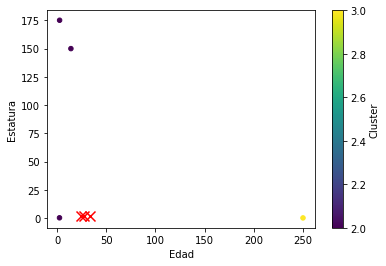

In [29]:
hard_clustering_predict(nuevas_observaciones,modelo_hard_clustering)

### Predicción Soft-Clustering

In [30]:
def predict_soft_k_means(df,k,x):
    
    x_predict = x.copy()
    gmm = mixture.GaussianMixture(n_components=k).fit(datos)
      
    # DataFrame de Salida: Observaciones con Cluster Asignado    
    cluster = gmm.predict(x_predict) + 1
    cluster_proba = gmm.predict_proba(x_predict)*100

    x_predict['Cluster']=cluster
    x_predict['Probabilidad Cluster 1 (%)']=cluster_proba[:,0].round(3)
    x_predict['Probabilidad Cluster 2 (%)']=cluster_proba[:,1].round(3)
    x_predict['Probabilidad Cluster 3 (%)']=cluster_proba[:,2].round(3)
    
    # Gráfica de Observaciones Agrupadas por Cluster y Gráfica de Centroides
    fig,ax1=plt.subplots()
    ax2 = x_predict.plot.scatter(x ="Edad",y="Estatura",c='Cluster',colormap='viridis',ax=ax1)
    print(ax2)
    
    
    return x_predict

AxesSubplot(0.125,0.125;0.62x0.755)


,Edad,Estatura,Cluster,Probabilidad Cluster 1 (%),Probabilidad Cluster 2 (%),Probabilidad Cluster 3 (%)
0,2.4,0.25,1,100.0,0.0,0.0
1,2.5,175.10,2,0.0,100.0,0.0
2,250.0,0.15,2,0.0,100.0,0.0
3,14.0,150.00,2,0.0,100.0,0.0


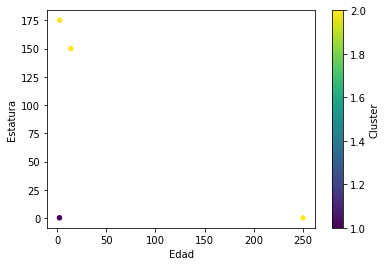

In [31]:
predict_soft_k_means(dataframe,3,nuevas_observaciones)

Con observaciones tan extremas (o atípicas) el modelo de soft-clustering dá probabilidades de 100% de pertenecer a cada cluster.